# Aurecon Exemplar Forum 2020: 
**Machine Learning and Data Analytics (90 mins)**

This notebook shows the reader how to use the open data from AEMO to build predictive models with python and machine learning packages. 

The main content covers the following five parts.
 
General Introduction <--- Slaven 5min

0. Checking List <--- Chris 5min
1. Case Introduction  <--- Chris 5min
2. Data Exploration   <--- Srimal 10min
3. Data Analysis      <--- Alex 15min
4. Data Preparation amd Modelling <--- Chris 15min
 - Linear model: LM                      <--- Srimal 15min
 - Multi-layer Precetptrons: MLP         <-- Chris 15min
 - Recurrent Neural Networks: RNN        <--- Alex 15min
 - Long-Short Memory Networks: LSTM      <--- Alex 15min	
Summary <-- Chris 5min



##### Copyright 2020 Aureon Data Analytic and Risk Team Authors.

## 0. Checking List (Chris)

This notebook is a demo showing how to use python and machine learning tools for practices. 

Reader should have read through the [README.md](../README.md) file and related [document](../Documents) for the preparations. 

<!-- ![Anaconda + Python + TensorFlow](./Images/figure_notebook_01_python.png ) -->
![Anaconda_Python_TensorFlow](../Images/figure_notebook_01_python.png ) 


## 1. Case Introduction (Chris)

**Background Knowledge**:

- Australian Energy Market Operator ([AEMO](https://aemo.com.au)) is a not-for-profit organisation partly owned by federal and state governments, with members from electricity and gas generation, transmission, distribution, retail and resources businesses across Australia. 
- According to AMEO 2019 annual report, their target is to achieve `short-term` and `long-term electricity demand forecast accuracy` within 3% and 5% of actual peak demand, respectively. 

**Data Analysis and Machine Learning Task**:  built a demand predictive system with AEMO dataset.
 
**Knowledge Requirments**:
- Basic Programming knowledge of Python and Related Programming tools.
- Basic Statistic，Linear algebra, Machine Learing and Neural Networks. 
 
<div class="alert alert-info"><h4>Related work and technology review</h4><p> The reviewing and researching section are not included in this tutorial, but it is very important for real data analysis work. One should always gather more research background knowledges on the topic.
Our exemplar is just for practice purposes, thus this step is omitted due to the time limit.</p></div>


## 2. Data Exploration (Srimal)

### 2.01. Data Explaination: aggregated price and demand data

The attached [data files](../Data/raw) provide price and demand data by region, cumulated by month. They are in simple CSV format and the data in them can be easily graphed using standard desktop applications. 

According to AEMO, the data dates back to the start of the NEM, 13 December 1998. Historical data is updated and extended by automatic processes at the end of each day. Price data is subject to review and occasional adjustment by the end of the next business day, in accordance with National Electricity Rule 3.8.1(c) and the Over Constrained Dispatch procedure. Prices become final on the second business day of the following month.

Data format:

| REGION | SETTLEMENTDATE      | TOTALDEMAND | RRP   | PERIODTYPE |
| ------ | ------------------- | ----------- | ----- | ---------- |
| ...    | ...                 | ...         | ...   | ...        |
| VIC1   | 2018/01/01 00:30:00 | 4251.18     | 92.46 | TRADE      |
| VIC1   | 2018/01/01 01:00:00 | 4092.53     | 87.62 | TRADE      |
| VIC1   | 2018/01/01 01:30:00 | 3958.95     | 73.08 | TRADE      |
| ...    | ...                 | ...         | ...   | ...        |

More information, please visit: [https://aemo.com.au/](https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data)




### 2.02. Read one single file, check the data type and shape

In [1]:
import pandas as pd 
df_csv = pd.read_csv('../Data/raw/PRICE_AND_DEMAND_201912_VIC1.csv')
print(type(df_csv)) # Show the df_csv data type
print(df_csv.shape) # check the df_csv table size

<class 'pandas.core.frame.DataFrame'>
(1488, 5)


### 2.03. Review the head and tail rows: understand the basic format and information of each column (variables)

In [2]:
df_csv.head(5) # check the first head rows

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/12/01 00:30:00,4227.01,41.34,TRADE
1,VIC1,2019/12/01 01:00:00,4128.30,42.50,TRADE
2,VIC1,2019/12/01 01:30:00,3978.96,37.95,TRADE
3,VIC1,2019/12/01 02:00:00,3792.20,19.99,TRADE
4,VIC1,2019/12/01 02:30:00,3711.64,42.50,TRADE


In [3]:
df_csv.tail(5) # check the tail rows

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
1483,VIC1,2019/12/31 22:00:00,4129.96,52.91,TRADE
1484,VIC1,2019/12/31 22:30:00,4083.66,58.66,TRADE
1485,VIC1,2019/12/31 23:00:00,4104.95,54.36,TRADE
1486,VIC1,2019/12/31 23:30:00,4325.88,66.87,TRADE
1487,VIC1,2020/01/01 00:00:00,4372.27,85.23,TRADE


### 2.04. Create figures of the time series data: total-demand and RRP

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F99A026E08>,
      dtype=object)

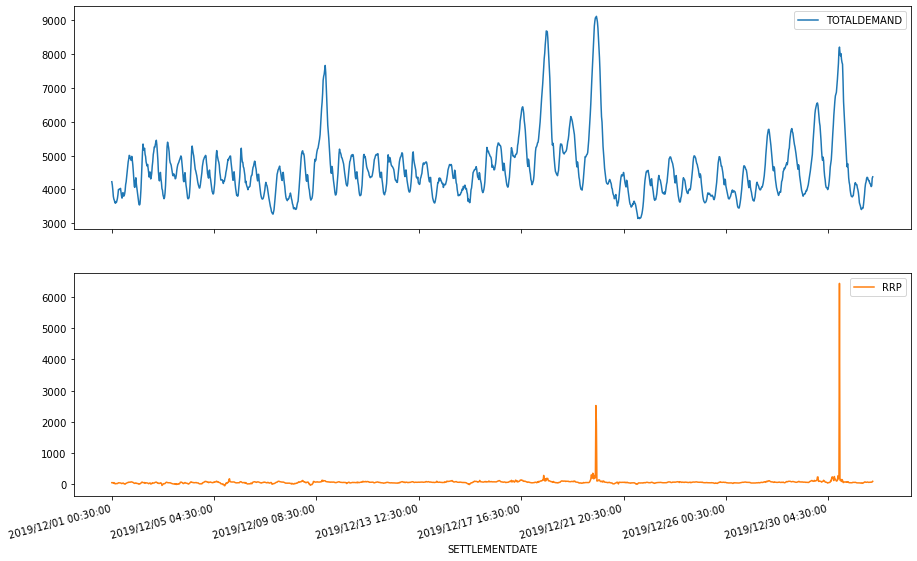

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
df_csv.plot(x="SETTLEMENTDATE", y=["TOTALDEMAND", "RRP"], figsize=(15,10), rot = 15, subplots=True)

## 3. Data Analysis (Alex)

### 3.01. Compute the basic statistic:

In [5]:
df_csv

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/12/01 00:30:00,4227.01,41.34,TRADE
1,VIC1,2019/12/01 01:00:00,4128.30,42.50,TRADE
2,VIC1,2019/12/01 01:30:00,3978.96,37.95,TRADE
3,VIC1,2019/12/01 02:00:00,3792.20,19.99,TRADE
4,VIC1,2019/12/01 02:30:00,3711.64,42.50,TRADE
...,...,...,...,...,...
1483,VIC1,2019/12/31 22:00:00,4129.96,52.91,TRADE
1484,VIC1,2019/12/31 22:30:00,4083.66,58.66,TRADE
1485,VIC1,2019/12/31 23:00:00,4104.95,54.36,TRADE
1486,VIC1,2019/12/31 23:30:00,4325.88,66.87,TRADE


In [6]:
df_csv.describe(include = 'all')

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
count,1488,1488,1488.000000,1488.000000,1488
unique,1,1488,NaN,NaN,1
top,VIC1,2019/12/10 03:30:00,NaN,NaN,TRADE
freq,1488,1,NaN,NaN,1488
mean,NaN,NaN,4597.432352,61.390255,NaN
std,NaN,NaN,917.140417,187.406557,NaN
min,NaN,NaN,3136.490000,-56.000000,NaN
25%,NaN,NaN,4025.127500,36.735000,NaN
50%,NaN,NaN,4402.520000,51.690000,NaN
75%,NaN,NaN,4898.702500,66.005000,NaN


In [7]:
df_csv.describe()


,TOTALDEMAND,RRP
count,1488.000000,1488.000000
mean,4597.432352,61.390255
std,917.140417,187.406557
min,3136.490000,-56.000000
25%,4025.127500,36.735000
50%,4402.520000,51.690000
75%,4898.702500,66.005000
max,9113.240000,6442.900000


### 3.02. Draw the KDE figures 
In statistics, **kernel density estimation (KDE)** is a non-parametric way to estimate the probability density function of a random variable.


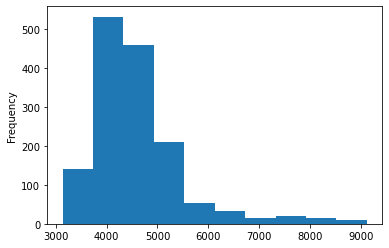

In [8]:
df_csv["TOTALDEMAND"].plot.hist()


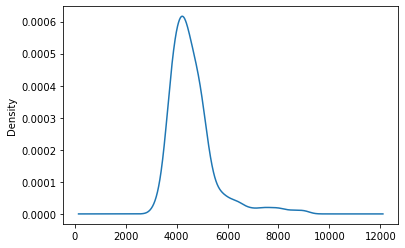

In [9]:
df_csv["TOTALDEMAND"].plot.kde()

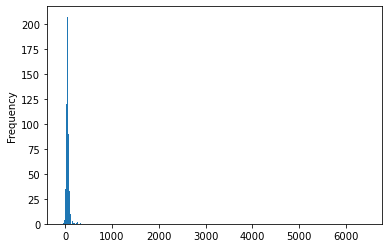

In [10]:
df_csv["RRP"].plot.hist(bins=1000)

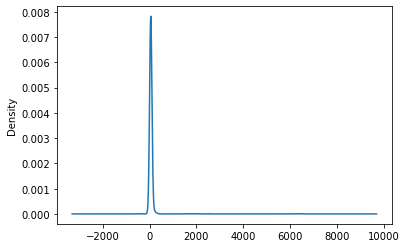

In [11]:
df_csv["RRP"].plot.kde()

### 3.03. Draw scatter figure of these two variables. 


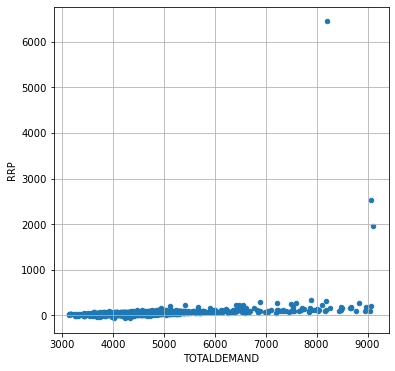

In [12]:
df_csv.plot.scatter( x = 'TOTALDEMAND', y = 'RRP', figsize = (6, 6),  grid = True)

### 3.04. Draw scatter figure with the KDEs


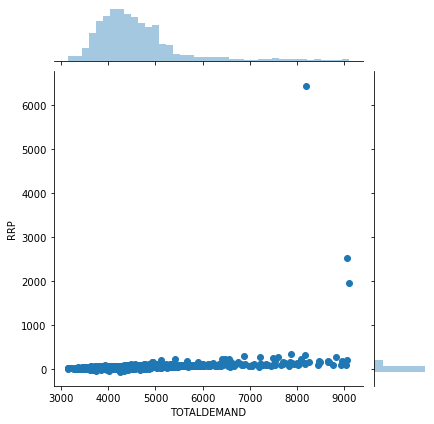

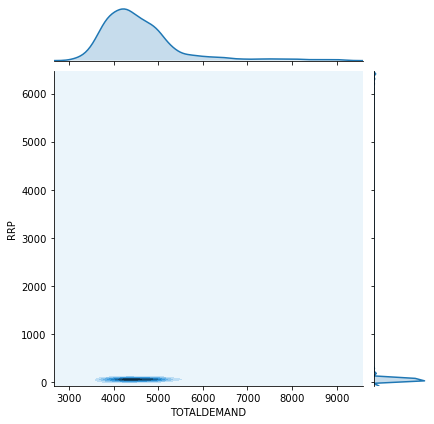

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 
 
sns.jointplot(x = "TOTALDEMAND", y = "RRP" , data = df_csv, kind="scatter")
sns.jointplot(x = "TOTALDEMAND", y = "RRP" , data = df_csv, kind="kde")

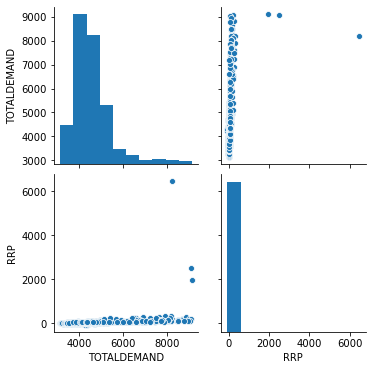

In [14]:
sns.pairplot(df_csv, height=2.5);

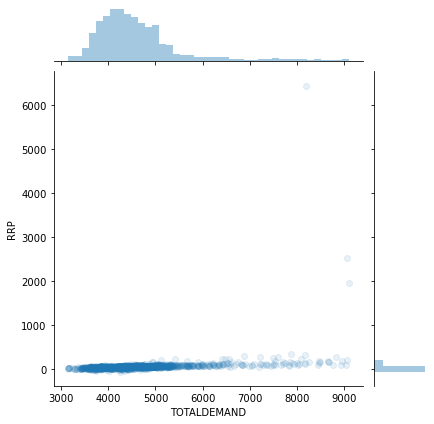

In [15]:
sns.jointplot(x = "TOTALDEMAND", y = "RRP" , data = df_csv, kind="scatter", alpha=0.1)

### 3.05. Data Normalization and Standardization
 

Data `Normalization` or `Standardization` generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an important equally important attribute(on lower scale) bcause of other attribute having values on larger scale. 
In simple words, when multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations. So they are preprocessed to bring all the attributes on the same scale or distribution.

Normalization typically means rescales the values into a range of [0,1] or [-1, 1]. 
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

For example: 
- Min-Max Normalization (Rescaling).
- z-Score Normalization (Standardization).

We will apply [ scikit-learn.preprocessing-scaler](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) to help us preprocess the data.

In [16]:
# Import the z-score function by sklearn packages
from sklearn.preprocessing import StandardScaler

# Extract the demand and price into numpy array.
data_demand = df_csv["TOTALDEMAND"].to_numpy().reshape(-1, 1)
data_price  = df_csv["RRP"].to_numpy().reshape(-1, 1)

print(data_demand.shape)

(1488, 1)


In [17]:
# Build a scaler for demand data 

scaler_demand = StandardScaler() # init a scaler
scaler_demand.fit(data_demand) # fit the data

# output the basic informations
print(scaler_demand.mean_)
print(scaler_demand.var_)
print(scaler_demand.n_samples_seen_)


[4597.43235215]
[840581.25859716]
1488


In [18]:
# transfrom the demand data into standarlised format.
X_demand = scaler_demand.transform(data_demand)

# Test demand is 6500
x_in = scaler_demand.transform([[6500]]) # becareful about the data format. 

print(f'The real demand is {6500}')
print(f'After standarlization is: {x_in}')
print(f'Inverse to the original value is {scaler_demand.inverse_transform(x_in)}')


The real demand is 6500
After standarlization is: [[2.07515364]]
Inverse to the original value is [[6500.]]


In [19]:
# repeat to the price
scaler_price = StandardScaler()
scaler_price.fit(data_price)
print(scaler_price.mean_)
print(scaler_price.var_)
print(scaler_price.n_samples_seen_)

X_price = scaler_price.transform(data_price)


[61.39025538]
[35097.61464523]
1488


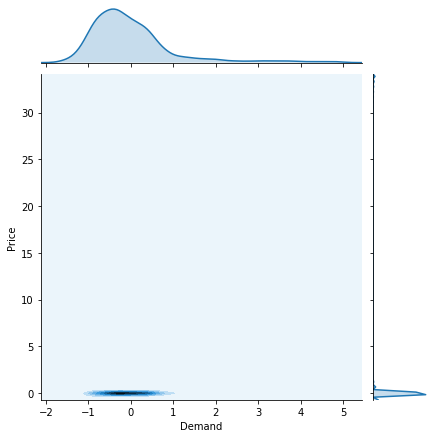

In [20]:
# review the data distribution
# sns.jointplot(x = "TOTALDEMAND", y = "RRP" , data = [X_demand, X_price], kind="kde")
sns.jointplot(x = X_demand, y = X_price,  kind="kde").set_axis_labels("Demand","Price")

### 4. Data Preparation amd Modelling (Chris)

#### 4.0. Preparing the samples
Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

**Assumption**:    
unknown demand = function (known-demand with the past $t_d$ samples)
- case 1: $d_t = f ([d_{t-1}, \cdots, d_{t-t_d}]) $

unknown demand = function (known-demand, known-price)
- case 2: $d_t = f ([d_{t-1}, \cdots, d_{t-t_d},  p_{t-1}, \cdots, p_{t-tp}]) $

**Prepare data pairs (input, output)**:
- Convert the time series data into table format.
- Split the data into the training and validation sets: 75% vs 25% 
- Check the distribution of the training and validation.

Case 01: $ X = [d_{t-1}, \cdots, d_{t-m}], Y = [d_t],  t_d = m. $

Case 02: $ X = [d_{t-1}, \cdots, d_{t-m}, p_{t-1}, \cdots,  p_{t-n}], Y = [d_t], t_d = m, t_p = n. $


**NOTE**
We only used the historical demand record to make demand prediction in our demon, which is using the last 6 hours demand (12 records) to predict the next 0.5 hour demand (1 record), for example, use the `2018/01/01 00:30:00 - 2018/01/01 06:00:00` demand records to predict the demand at `2018/01/01 06:30:00`.

- case 1: $d_t = f ([d_{t-1}, \cdots, d_{t-t-12}]) $


<div class="alert alert-danger"><h4>Warning</h4><p> Data preparation is the most important step before modelling. Good data preparation allows for efficient analysis, limits errors and inaccuracies that can occur to data during processing, and makes all processed data more accessible to users. It’s also gotten easier with new tools that enable any user to cleanse and qualify data on their own.
Data preparation is often a lengthy undertaking for data professionals or business users, but it is essential as a prerequisite to put data in context in order to turn it into insights and eliminate bias resulting from poor data quality. </p></div>

Read and merge all the data files

In [21]:
import os
import glob
import numpy as np
import joblib
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [22]:
path =  Path("../Data/raw")
all_files = glob.glob(os.path.join(path, "*.csv"))
df_csv = pd.concat((pd.read_csv(f) for f in all_files))

In [23]:
df_csv.describe()

,TOTALDEMAND,RRP
count,35040.000000,35040.000000
mean,4932.293311,99.910524
std,863.693202,317.976582
min,3058.200000,-554.620000
25%,4284.952500,64.650000
50%,4831.930000,85.910000
75%,5427.075000,107.270000
max,9289.500000,14500.000000


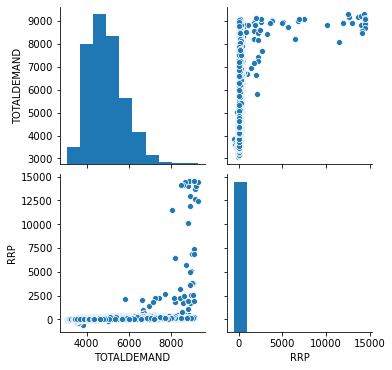

In [24]:
sns.pairplot(df_csv, height=2.5);

**Prepare some functions**

In [25]:
def normalise_data(df_csv):
    """
    Description: normalise total-demand data
    Input: df_csv
    Output: 
        X: an array (time series) of normalised_demand
    """
    data_demand = df_csv["TOTALDEMAND"].to_numpy().reshape(-1, 1)
    
    scaler_demand = StandardScaler()
    scaler_demand.fit(data_demand)
    X = scaler_demand.transform(data_demand)
    
    return X, scaler_demand


In [26]:
def vec2mat(V, din, dout):
    import numpy as np
    """
    Convert the vector to matrix
    V: input vector, shape(N,1), numpy array/ 2D Matrix
    din:  input demensionality. datatype: integer 
    dout: output demensionality. datatype: integer
    M: matrix with shape (N-din, din+dout)
    """
    V = V.reshape(-1,1)
    N, p = V.shape
    din =  np.uint32(din)
    dout = np.uint32(dout)
    if N<din+dout or p !=1:
        print(f"check {din}+{dout}>={N} ?")
        print(f"check {p} == 1 ?")
        return "[ERROR] Check: Row din+dout <=Number and V should be column matrix"
    M = np.zeros([N-din-dout+1, din+dout])
    for i in range(N-din-dout+1) :
        M[i,:] = V[i:din+dout + i].flat # add the window to the output matrix
    return M


In [27]:
def generate_dataset(df_csv, n_dim_in, n_dim_out, test_ratio):
    """
    Description: Split training and testing data based on the input test_ratio by order. First part is assigned to train set and last part is assigned to test part.
    Input:
        + df_data: data in data frame format includes target in last column, features in remain columns.
        + test_ratio
    Output: X_train, y_train, X_test, y_test
    """    
    X_demand, scaler_demand = normalise_data(df_csv)
    # convert vector to array n_dim (number of previous demands used to predict)
    
    M_demand = vec2mat(X_demand, n_dim_in, n_dim_out)
    #print(M_demand.shape)
    n_row, n_col = M_demand.shape

    X = M_demand[:,0:n_col-n_dim_out]
    y = M_demand[:,n_col-n_dim_out:]

    train_ratio = 1-test_ratio
    n_train = int(n_row*train_ratio)

    # extract train data
    X_train = X[0:n_train][:]
    y_train = y[0:n_train][:]

    # extract test data
    X_test = X[n_train:][:]
    y_test = y[n_train:][:]

    return X_train, y_train, X_test, y_test, scaler_demand


In [28]:
# Visualisation
def visualise_train_test(X_train,y_train,X_test,y_test,y_pred):
    """
    Description: Visualise the training, testing, and predicted data
    """
    n_train = X_train.shape[0]
    #print(n_train)
    t = np.arange(0,n_train,1)
    n_test = X_test.shape[0]
    plt.figure(figsize=(20,10))
    #plt.plot(np.arange(0,n_train,1),y_train,"blue",label="train data")
    plt.plot(np.arange(n_train,n_train+n_test,1),y_test,"green",label="ground truth")
    plt.plot(np.arange(n_train,n_train+n_test,1),y_pred,"r--",label="prediction")
    plt.title("ENERGY DEMAND PREDICTION")
    plt.legend(loc=0)
    return 

**Generate the training dataset and test dataset**

** Reminder** We only used the historical demand record to make demand prediction in our demon, which is 6 hours demand (12 records) to predict the next 0.5 hour (1 record), for example, use the `2018/01/01 00:30:00 - 2018/01/01 06:00:00` demand record to predict the demand at `2018/01/01 06:30:00`.

In [29]:
test_ratio = 0.25
n_dim_in = 12 # Last 6 hours 
n_dim_out = 1 # Future 0.5 hour

X_train, y_train, X_test, y_test, scaler_demand = generate_dataset(df_csv,n_dim_in,n_dim_out,test_ratio)

print(f"Training samples: {X_train.shape}, {y_train.shape}")
print(f"Testing samples: {X_test.shape}, {X_test.shape}")
 

Training samples: (26271, 12), (26271, 1)
Testing samples: (8757, 12), (8757, 12)


In [30]:
scaler_demand

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
def mean_absolute_error(y_true, y_pred): 
    # or from sklearn.metrics import mean_absolute_error.
    y_true, y_pred = np.array(y_true), np.array(y_pred)  
    errors = np.abs(y_true - y_pred)
    return np.mean(errors)

In [32]:
def mean_absolute_percentage_error(y_true, y_pred):  # be carefully with the zero division issues!!!
    y_true, y_pred = np.array(y_true), np.array(y_pred) # list to array
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
def plot_result(y_pred, y_test, scaler_demand):
    t = np.arange(1, 100)
    fig, ax = plt.subplots()
    line1, = ax.plot(t, scaler_demand.inverse_transform(y_pred[t]), label='model prediction')
    line2, = ax.plot(t, scaler_demand.inverse_transform(y_test[t]), label='real demand records')
    plt.xlabel('sample index')
    plt.ylabel('Elec-Demand')
    ax.legend()
    fig.tight_layout()
    plt.show()



<div class="alert alert-info"><h4>General Machine Learning Workflow of Modeling:</h4>
<p>  
General Machine Learning Workflow of Modeling:

1. prepare the data. 
2. initialize a model (model structure and algorithm).
3. build the model (train and validation).
4. test the model performance.
5. save the model.
     
</p></div>




### 4.1 Linear regression Model (LM) (Srimal)
**Model**: LM linear regression model

**Linear regression** performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

<img  src="https://miro.medium.com/max/1280/1*fX95txC9xSwSPeP6ch2nmg.gif" title="Demonstration of linear regression"  />

**Simple linear relationship:** 
y= mx + b

In [34]:
from sklearn import linear_model # Required package
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Testing
y_pred = model.predict(X_test)

In [36]:
# visualise normalised train and test 
# visualise_train_test(scaler_demand.inverse_transform(X_train), 
#                      scaler_demand.inverse_transform(y_train), 
#                     scaler_demand.inverse_transform(X_test), 
#                 scaler_demand.inverse_transform(y_test), 
#                 scaler_demand.inverse_transform(y_pred))

In [37]:
# Evaluation
print("**************EVALUATION:**************")
mean_abs_err     = mean_absolute_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))
print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)


**************EVALUATION:**************
Loss: Absolute error: 74.1208
Loss: Absolute percentage error: 1.5171 % 


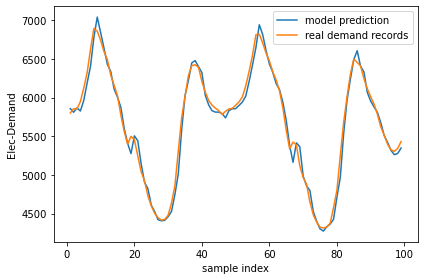

In [38]:
plot_result(y_pred, y_test, scaler_demand)

In [39]:
# save the model to disk
filename = './models/LM.joblib' + '.z'
joblib.dump(model, filename )  
del model

In [40]:
# load the model to use
loaded_Model = joblib.load(filename)
y_pred = loaded_Model.predict(X_test)
mean_abs_err     = mean_absolute_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))
print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)

Loss: Absolute error: 74.1208
Loss: Absolute percentage error: 1.5171 % 


### 4.2 Multi-layer Perceptron Model (MLP) (Chris)
**A multilayer perceptron (MLP)** is a class of feedforward artificial neural network (ANN). An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

<img src="https://cdn-images-1.medium.com/freeze/max/1000/1*Ne7jPeR6Vrl1f9d7pLLG8Q.jpeg?q=20" />

#### 4.2.1. MLP with Scikit-learn
**Model**: MLP

**Loss function**: squared-loss  (default loss function in sklearn - no customise)

**Library**: py/sklearn 

**Reference**: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [41]:
from sklearn.neural_network import MLPRegressor

# init a model
model = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver = 'sgd',
                                 alpha = 0.0001,
                                 batch_size=32,
                                 learning_rate_init=0.001,
                                 max_iter = 1000, verbose = False,
                                 early_stopping=True)


In [42]:
model


MLPRegressor(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Question: what would happen if we change hidden_layer_sizes=(50) to 
- hidden_layer_sizes=(100)
- hidden_layer_sizes=(50, 50)

In [43]:
# train the model
model.fit(X_train, y_train.ravel())

# predict from trained model
y_pred = model.predict(X_test)

In [44]:
# visualise_train_test(scaler_demand.inverse_transform(X_train),scaler_demand.inverse_transform(y_train),scaler_demand.inverse_transform(X_test),scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))

In [45]:
y_test.shape

(8757, 1)

In [46]:
y_pred.shape

(8757,)

In [47]:
print("**************EVALUATION:**************")
mean_abs_err = mean_absolute_error(scaler_demand.inverse_transform(y_test.ravel()),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(y_test.ravel()),scaler_demand.inverse_transform(y_pred))

print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)


**************EVALUATION:**************
Loss: Absolute error: 67.3232
Loss: Absolute percentage error: 1.3914 % 


In [48]:
# save the model to disk
filename = './models/MLP.joblib' + '.z'
joblib.dump(model, filename)  

del model

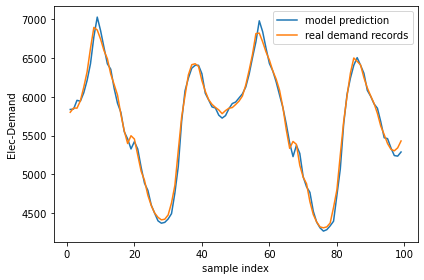

In [49]:
plot_result(y_pred, y_test, scaler_demand)

#### 4.2.2 MLP with tensorflow-keras

Model: MLP

Library: tensorflow/keras

Ref: https://www.tensorflow.org/guide/keras/train_and_evaluate

Feature shape: (12,)
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer (Dense)         (None, 50)                650       
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


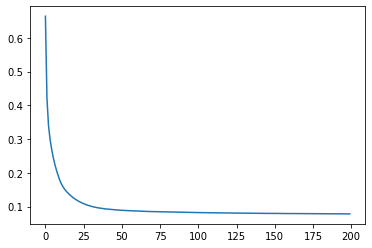

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# input shape
input_shape = (X_train.shape[1],)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential(name = 'MLP')
model.add(layers.Dense(50, input_shape=input_shape, activation='relu', name = 'Hidden_Layer'))
# model.add(layers.Dense(50, activation='relu')) # add another layer
model.add(layers.Dense(1, name = 'Output_Layer'))
model.summary()

# Configure the model and start training
model.compile(loss='mae', optimizer='sgd', metrics=['mae','mse'])

history = model.fit(X_train, y_train, epochs=200, batch_size=1024, verbose=0)

plt.plot(history.history['loss'])

In [51]:
print("**************TESTING THE TRAINED MODEL**************")
# convert the shape of the output to be the same with the shape of y_test. IT IS IMPORTANT TO USE FLATTEN() function
y_pred = model.predict(X_test)

**************TESTING THE TRAINED MODEL**************


In [52]:
print("**************EVALUATION:**************")
mean_abs_err = mean_absolute_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(y_test),scaler_demand.inverse_transform(y_pred))

print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)

**************EVALUATION:**************
Loss: Absolute error: 64.9560
Loss: Absolute percentage error: 1.3338 % 


In [53]:
# save the model to disk
print("**************SAVING THE TRAINED MODEL**************")
filename = './models/MLP.TF' + '.h5'
model.save(filename) 
del model

**************SAVING THE TRAINED MODEL**************


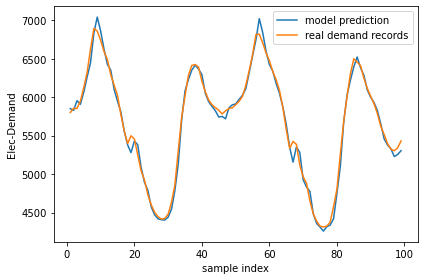

In [54]:
plot_result(y_pred, y_test, scaler_demand)

### 4.3  Recurrent Neural Networks (RNN) (Alex)
**Model**: RNN
Recurrent Neural Networks (RNN) comes from the idea of feed-forwarding neural network to utlizie past information for the future passes of hidden layers. RNN transmits hidden state from the previous step for each new element of the input sequence.

<img  src="https://miro.medium.com/max/275/1*T_ECcHZWpjn0Ki4_4BEzow.gif" alt="" title="" />

**Simple RNN in Keras**
`tf.keras.layers.SimpleRNN`
`SimpleRNN` processes batches of sequences, like all other Keras layers, not a single sequence. This means it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, input_features).
**References**
[Keras documentation](https://www.tensorflow.org/guide/keras/rnn)

In [55]:
import os
import glob
import pandas as pd 
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [56]:

model = tf.keras.models.Sequential(name = 'RNN')
model.add( layers.SimpleRNN(units = 50, input_shape=(1,n_dim_in), activation="relu", name = 'Recurrent_Layer'))
# model.add( layers.Dense(50, activation="relu")) 
model.add( layers.Dense(1, name = 'Output_layer'))
model.compile(loss='mae', optimizer='adam', metrics = ['mae', 'mape', 'mse'])
model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Recurrent_Layer (SimpleRNN)  (None, 50)                3150      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 51        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [57]:
trainX = np.reshape(X_train, ( X_train.shape[0], 1, X_train.shape[1]))
testX  = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
trainY = y_train
testY  = y_test

trainX.shape

(26271, 1, 12)

In [58]:
history = model.fit(trainX, trainY, epochs=200, batch_size=1024, verbose=0) # lower the batch_size if your RAM is small.

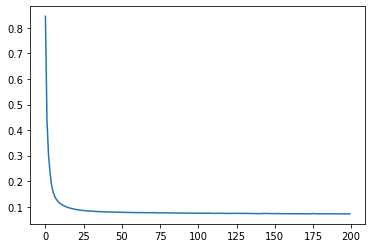

In [59]:
# print('\nhistory dict:', history.history)?
plt.plot(history.history['loss'])

In [60]:
# predict from trained model
y_pred = model.predict(testX) 

In [61]:
# Evaluation
print("**************EVALUATION:**************")
mean_abs_err     = mean_absolute_error(scaler_demand.inverse_transform(testY),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(testY),scaler_demand.inverse_transform(y_pred))
print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)

**************EVALUATION:**************
Loss: Absolute error: 60.8033
Loss: Absolute percentage error: 1.2561 % 


In [62]:
# save the model to disk
filename = './models/RNN.TF' + '.h5'
model.save(filename) 
del model

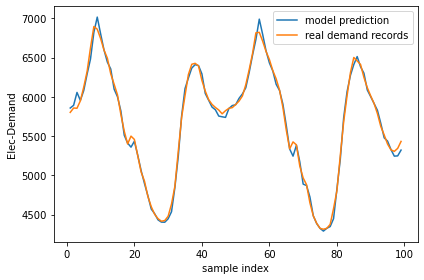

In [63]:
plot_result(y_pred, y_test, scaler_demand)

### 4.4 Long Short Term Memory networks (Alex)

**Description**

Long Short Term Memory networks (LSTM) - a special kind of RNN which are capable of learning long-term dependencies. There are three types of gates and a state within a unit.

<img src="https://miro.medium.com/max/1668/1*yBXV9o5q7L_CvY7quJt3WQ.png" alt="" title="" width="400" />

 
**LSTM in Keras**
`tf.keras.layers.LSTM`

**References**

[Animated guide to LSTM](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)
<br>
[Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [64]:
model = tf.keras.models.Sequential(name = 'LSTM')
model.add( layers.LSTM(50, input_shape=(1, n_dim_in), name = 'LSTM_layer'))
# model.add( layers.Dense(50, activation="relu")) 
model.add( layers.Dense(1, name = 'Output_layer'))
model.compile(loss='mae', optimizer='adam', metrics = ['mae', 'mape', 'mse'])
model.summary()

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_layer (LSTM)            (None, 50)                12600     
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 51        
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(trainX, trainY, epochs= 200, batch_size=1024, verbose=0)

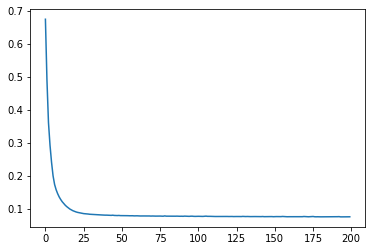

In [66]:
# print('\nhistory dict:', history.history)?
plt.plot(history.history['loss'])

In [67]:
# predict from trained model
y_pred = model.predict(testX) 

In [68]:
# Evaluation
print("**************EVALUATION:**************")
mean_abs_err     = mean_absolute_error(scaler_demand.inverse_transform(testY),scaler_demand.inverse_transform(y_pred))
mean_abs_per_err = mean_absolute_percentage_error(scaler_demand.inverse_transform(testY),scaler_demand.inverse_transform(y_pred))
print("Loss: Absolute error: %.4f" % mean_abs_err)
print("Loss: Absolute percentage error: %.4f %% " % mean_abs_per_err)

**************EVALUATION:**************
Loss: Absolute error: 62.7164
Loss: Absolute percentage error: 1.2968 % 


In [69]:
# save the model to disk
filename = './models/LSTM.TF' + '.h5'
model.save(filename) 
del model

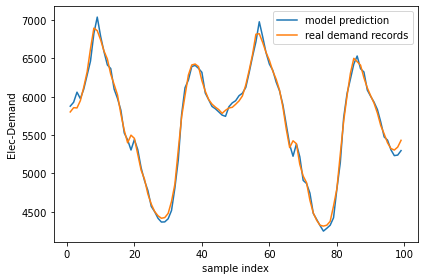

In [70]:
plot_result(y_pred, y_test, scaler_demand)

## Summary (Chris)

ML in Data Analysis: 

1. preprocesing the data. 
2. initialize a model (model structure and algorithm).
3. build the model (training and validation).
4. test the model performance.
5. save the model (for deployment).

Think and discuss how to imporve the following models.
- Linear Model (LM)?
- Neural Networks (NN/MLP)?
- Recurrent Neural Networks (RNN)?
- Long short Memory Networks (LSTM)? 

What we did not cover in this demo?
- feature engineering. 
- model regularization and selections:
    - minimize the model structural risk. 
    - avoid overfitting.
- cross validation.  
 

# Challenge to be solved by you in Hackathon after the tutorial.

Use the provided data to build a electricity demand predictive model with the following conditions:

1. Add the `price` record (RRP) as a new input variable for the model.
2. Document your analysis and modelling codes in jupyter notebook.
3. Design the testing functions of your model, for example:

   - data-processing function.
   - model prediction functions.
     - make short-term prediction: 2 hours (4 timestamps ahead).
     - make long-term prediction: 6 hours (12 timestamps ahead).
   - report `mean-absolute-error` and `mean-absolute-error-rate` (function already given).

4. Apply cross validation method or optimization method to improve model's performance.
5. Push your repo to your personal GitLab and then fork to Aurecon Data Science GitLab before **Wednesday morning 9:00 am AEST, 27-May-2020**.
6. Test data for model evaluation will be released on **Wednesday morning 9:00 am AEST, 27-May-2020**.
7. Run your pre-trained model with test data in a new jupyter notebook and push it with your results to Gitlab.


### END